# Gradient boosting models

## Generating some random data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

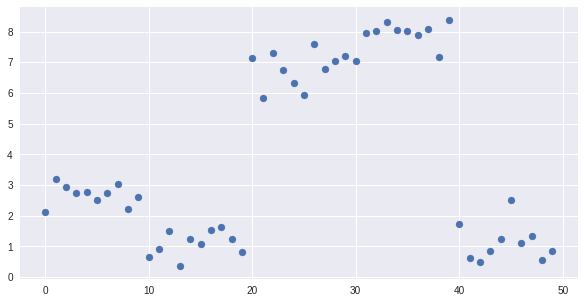

In [3]:
# Generate some random data

x = np.arange(0, 50)

random_y = np.random.randint(12, size=5)
y = np.array([np.random.normal(loc=random_y[i], scale=.5, size=10) for i in range(random_y.shape[0])]).reshape(-1,)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax = ax.scatter(x, y)

## Fitting 1st model

In [194]:
# I will first fit a LR model

x_tilde = x - np.mean(x)
y_tilde = y - np.mean(y)

cov_x_y = x_tilde.T @ y_tilde
var_x = x_tilde.T @ x_tilde

b_one = cov_x_y/var_x

y_tilde_hat = x_tilde * b_one

# residuals
e = y_tilde - y_tilde_hat

(-10, 10)

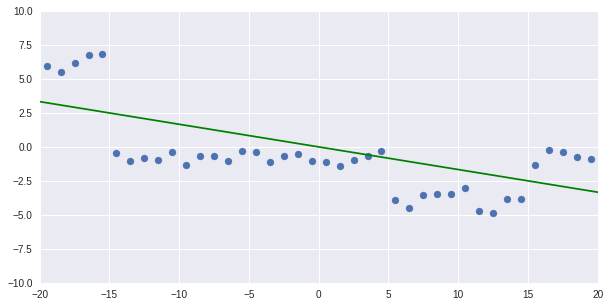

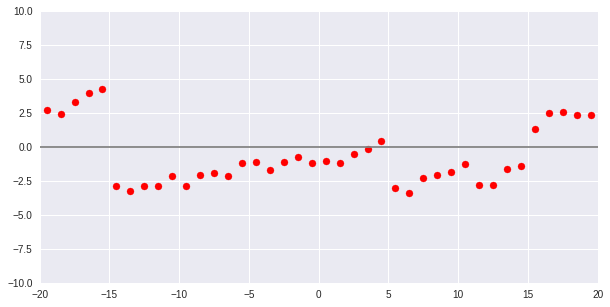

In [195]:
# visualising the resulting line

fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(1,1,1)
ax1.scatter(x_tilde, y_tilde)
ax1.set_xlim(-20,20)
ax1.set_ylim(-10,10)
ax1.plot(x_tilde, y_tilde_hat, c='g')

# visualizing residuals

fig2 = plt.figure(figsize=(10,5))
ax2 = fig2.add_subplot(1,1,1)
ax2.scatter(x_tilde, e, c='r')
ax2.plot(x_tilde, np.zeros_like(x_tilde), c='grey')
ax2.set_xlim(-20,20)
ax2.set_ylim(-10,10)

## Fitting 2nd model

(-10, 10)

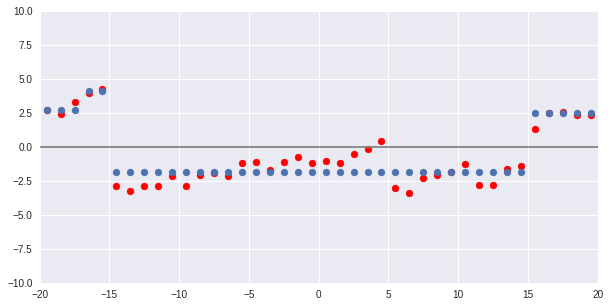

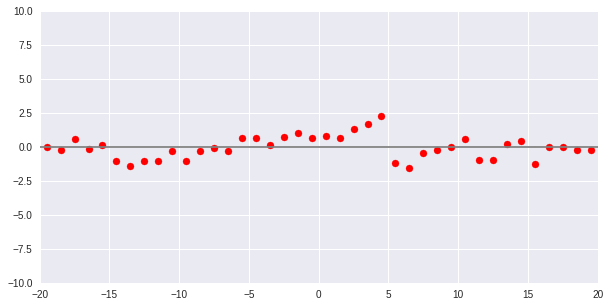

In [196]:
# for my subsequent models, i will try to fit decision trees

from sklearn.tree import DecisionTreeRegressor

# fitting and predicting with DT
tree_model_1 = DecisionTreeRegressor(max_depth=2, random_state=1234)

tree_model_1.fit(X=x_tilde[:,np.newaxis], y=e)

y_tilde_hat_1 = tree_model_1.predict(x_tilde[:,np.newaxis])

# computing residuals
e_1 = e -y_tilde_hat_1

# visualising fitted model
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(1,1,1)
ax3.scatter(x_tilde, e, c='r')
ax3.plot(x_tilde, np.zeros_like(x_tilde), c='grey')
ax3.scatter(x_tilde, y_tilde_hat_1)
ax3.set_xlim(-20,20)
ax3.set_ylim(-10,10)

# visualising residuals
fig4 = plt.figure(figsize=(10,5))
ax4 = fig4.add_subplot(1,1,1)
ax4.scatter(x_tilde, e_1, c='r')
ax4.plot(x_tilde, np.zeros_like(x_tilde), c='grey')
ax4.set_xlim(-20,20)
ax4.set_ylim(-10,10)

## Fitting 3rd model

(-10, 10)

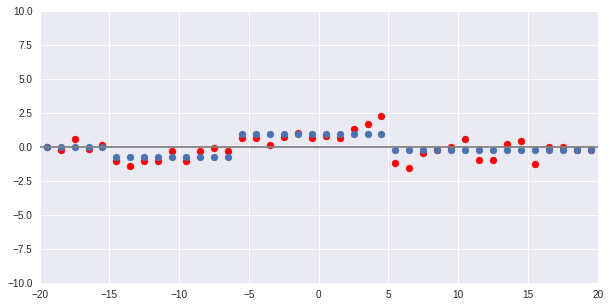

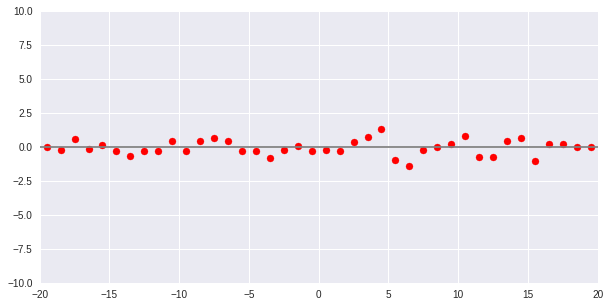

In [198]:
# I will fit another DT

tree_model_2 = DecisionTreeRegressor(max_depth=2, random_state=1234)

tree_model_2.fit(X=x_tilde[:,np.newaxis], y=e_1)

y_tilde_hat_2 = tree_model_2.predict(x_tilde[:,np.newaxis])

# computing residuals
e_2 = e_1 - y_tilde_hat_2

# visualising fitted tree

fig5 = plt.figure(figsize=(10,5))
ax5 = fig5.add_subplot(1,1,1)
ax5.scatter(x_tilde, e_1, c='r')
ax5.plot(x_tilde, np.zeros_like(x_tilde), c='grey')
ax5.scatter(x_tilde, y_tilde_hat_2)
ax5.set_xlim(-20,20)
ax5.set_ylim(-10,10)

# visualising residuals

fig6 = plt.figure(figsize=(10,5))
ax6 = fig6.add_subplot(1,1,1)
ax6.scatter(x_tilde, e_2, c='r')
ax6.plot(x_tilde, np.zeros_like(x_tilde), c='grey')
ax6.set_xlim(-20,20)
ax6.set_ylim(-10,10)

## Comparing iterations predictions

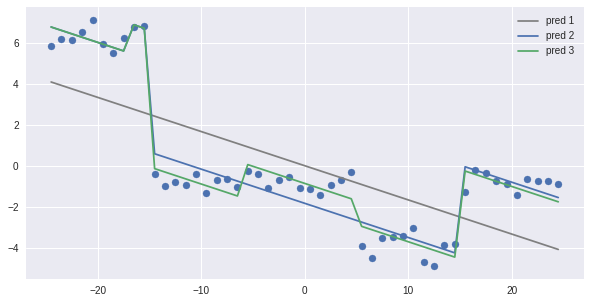

In [200]:
fig7 = plt.figure(figsize=(10,5))
ax7 = fig7.add_subplot(1,1,1)

# visualising original data
ax7.scatter(x_tilde, y_tilde)

# visualising original prediction
ax7.plot(x_tilde, y_tilde_hat, c='grey', label='pred 1')

# visualising prediction after dt 1
ax7.plot(x_tilde, y_tilde_hat + y_tilde_hat_1, label='pred 2')

# visualising prediction after dt 2
ax7.plot(x_tilde, y_tilde_hat + y_tilde_hat_1 + y_tilde_hat_2, label='pred 3')

plt.legend()